In [1]:
# importando bibliotecas
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D # biblioteca que permite plotar gráficos 3d


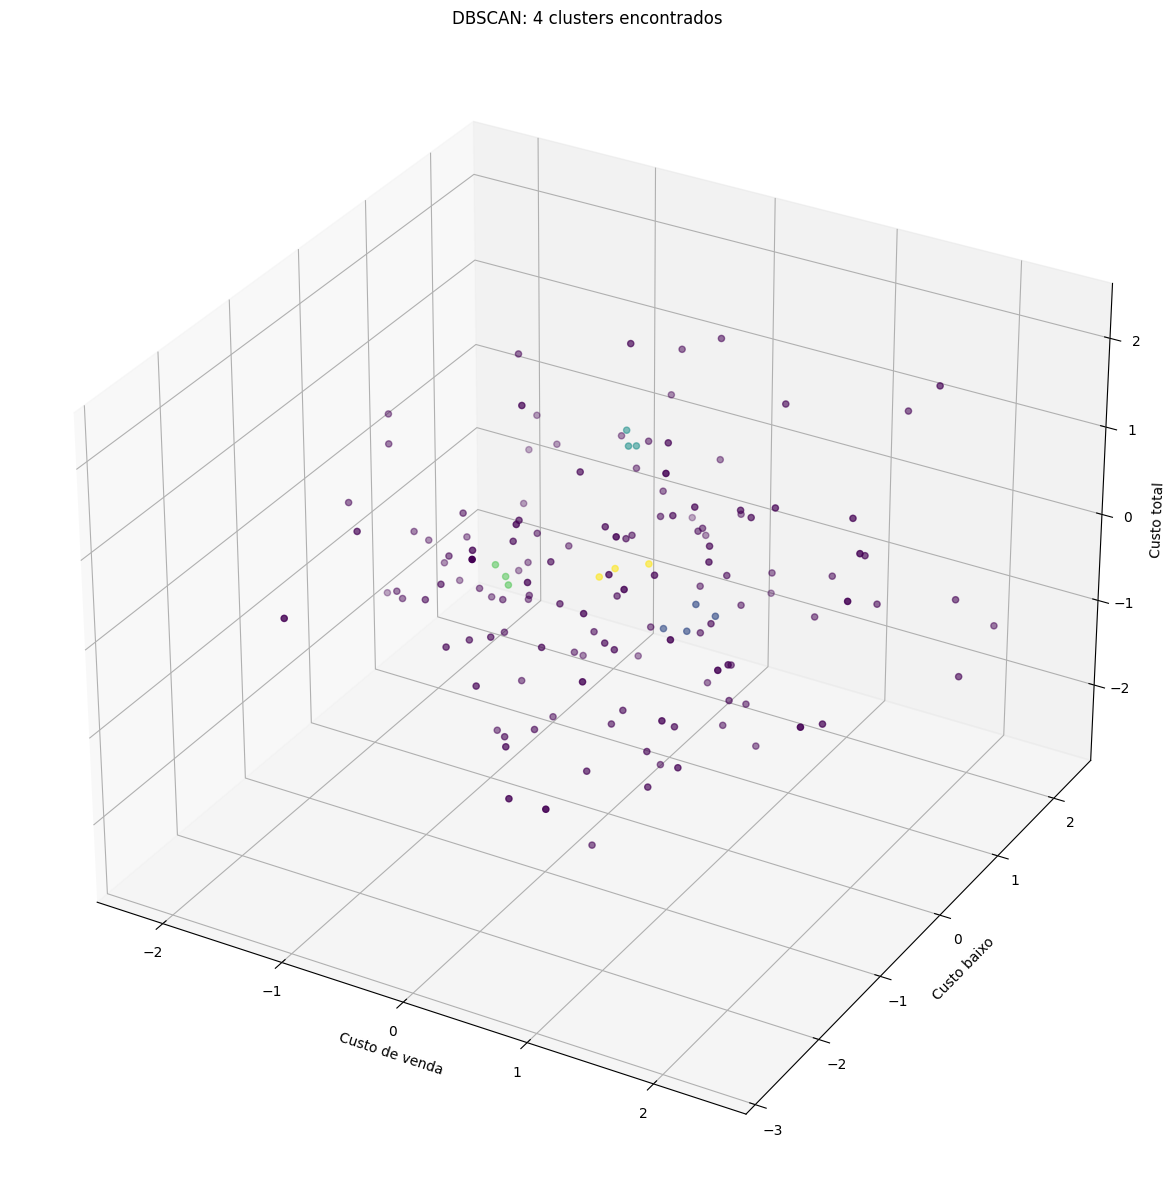

In [5]:
# Gerando dados de exemplo
np.random.seed(0)
n_samples = 150
X = np.random.randn(n_samples, 3)
# Executando o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(X)
# Obtendo os rótulos dos clusters
labels = dbscan.labels_
# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # atribui quantidade de   clusters
n_noise = list(labels).count(-1) # armazena em n_noise a quantidade de clusters
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.set_title('DBSCAN: %d clusters encontrados' % n_clusters)
ax.set_xlabel('Custo de venda')
ax.set_ylabel('Custo baixo')
ax.set_zlabel('Custo total')
plt.show()



In [8]:
# Passo 1 importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D # biblioteca para plotar o gráfico 3d
import pandas as pd 

In [9]:
# Passo 2 Carregar os dados para realizar a análise

dados_filmes = pd.DataFrame({
    'Gênero': ['Ação', 'Aventura', 'Comédia', 'Drama', 'Romance', 'Terror', 'Suspense'],
    'Duração': [120, 150, 90, 120, 110, 100, 130],
    'Avaliação': [4.5, 4.2, 3.9, 4.1, 3.8, 4.3, 3.7]
})


In [10]:
# Exibir os dados do dataframe
print(dados_filmes)

     Gênero  Duração  Avaliação
0      Ação      120        4.5
1  Aventura      150        4.2
2   Comédia       90        3.9
3     Drama      120        4.1
4   Romance      110        3.8
5    Terror      100        4.3
6  Suspense      130        3.7


In [ ]:
# 4º Passo pré processamento dos dados  
#Neste caso não é necessário realizar o pré processamento dos dados


In [11]:
# 5º Passo aplicar o algoritmo DBScan

dbscan = DBSCAN(eps=10, min_samples=10)  # Definindo os parâmetros eps e min_samples
clusters = dbscan.fit_predict(dados_filmes[['Duração', 'Avaliação']])


In [12]:
clusters

array([-1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [14]:
# Passo 6: Avaliar o desempenho do modelo DBSCAN
numero_clusters = len(np.unique(clusters)) - 1  # Desconsiderando o cluster de ruído (-1)
print(numero_clusters)

0


Número de clusters: 0


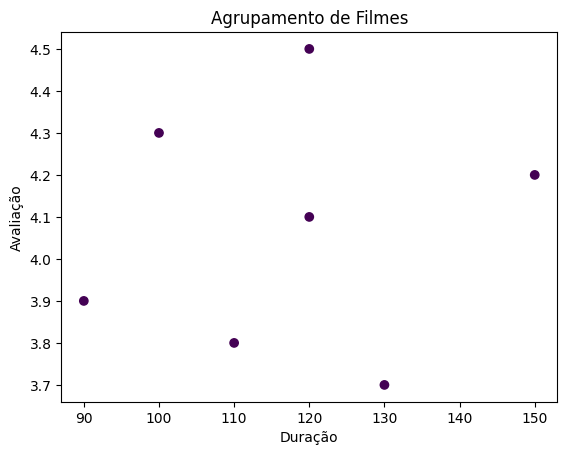

In [15]:
print("Número de clusters:", numero_clusters)
# Passo 7: Visualizar os resultados do agrupamento
plt.scatter(dados_filmes['Duração'], dados_filmes['Avaliação'], c=clusters)
plt.xlabel('Duração')
plt.ylabel('Avaliação')
plt.title('Agrupamento de Filmes')
plt.show()
# Passo 8: Analisar os grupos resultantes
dados_filmes['Cluster'] = clusters
grouped_data = dados_filmes.groupby('Cluster')
print(grouped_data)


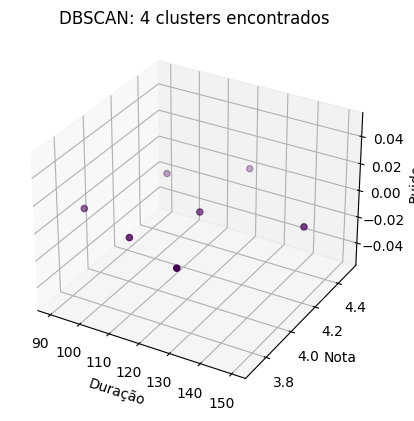

In [16]:
# Criando o gráfico em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(dados_filmes['Duração'], dados_filmes['Avaliação'], c=clusters)

ax.set_title('DBSCAN: %d clusters encontrados' % n_clusters)
ax.set_xlabel('Duração')
ax.set_ylabel('Nota')
ax.set_zlabel('Ruido')

plt.show()


In [20]:
n_clusters

4

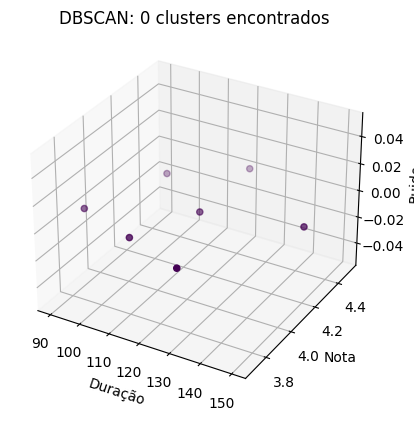

In [21]:
# Criando o gráfico em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(dados_filmes['Duração'], dados_filmes['Avaliação'], c=clusters)

ax.set_title('DBSCAN: %d clusters encontrados' % numero_clusters)
ax.set_xlabel('Duração')
ax.set_ylabel('Nota')
ax.set_zlabel('Ruido')

plt.show()


In [22]:
# Exercicio imoveis
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN


In [23]:
imoveis ={
          'Area':[80,80,80,150,200,90,110,130,180,160],
          'Valor':[300,450,550,600,350,420,550,780,360,575],
          'Dist_praia':[15,15,8,25,12,15,22,8,5,14]

}
Label =['1º','2º','3º','4º','5º','6º','7º','8º','9º','10º']
imoveis_df=pd.DataFrame(imoveis, index= Label)
imoveis_df.head()


,Area,Valor,Dist_praia
1º,80,300,15
2º,80,450,15
3º,80,550,8
4º,150,600,25
5º,200,350,12


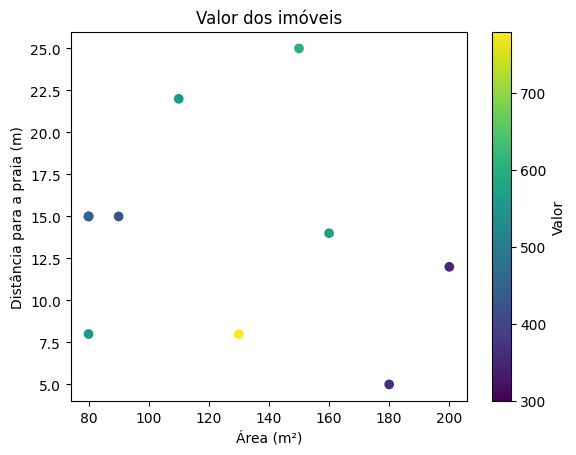

In [24]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['Valor'])
plt.xlabel('Área (m²)')
plt.ylabel('Distância para a praia (m)')
plt.title('Valor dos imóveis')
plt.colorbar(label='Valor')
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

# Escalar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imoveis_df[['Area', 'Dist_praia']])

from sklearn.cluster import DBSCAN

# Executar o algoritmo DBSCAN
dbscan = DBSCAN(eps=30, min_samples=5)
dbscan.fit(scaled_data)

# Obter os rótulos dos clusters
labels = dbscan.labels_


cluster
0    493.5
Name: Valor, dtype: float64
Número de clusters encontrados: 1


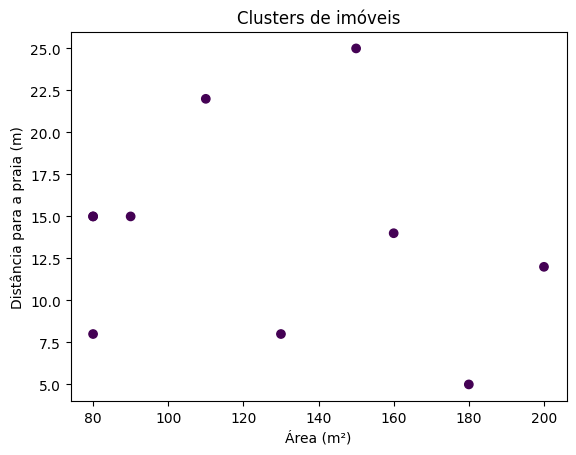

In [29]:
# Adicionar os rótulos dos clusters ao DataFrame
imoveis_df['cluster'] = labels

# Calcular o valor médio dos imóveis em cada cluster
mean_values =imoveis_df.groupby('cluster')['Valor'].mean()

# Exibir os valores médios dos imóveis em cada cluster
print(mean_values)
# Número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Gráfico de dispersão com os clusters
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['cluster'])
plt.xlabel('Área (m²)')
plt.ylabel('Distância para a praia (m)')
plt.title('Clusters de imóveis')
plt.show()


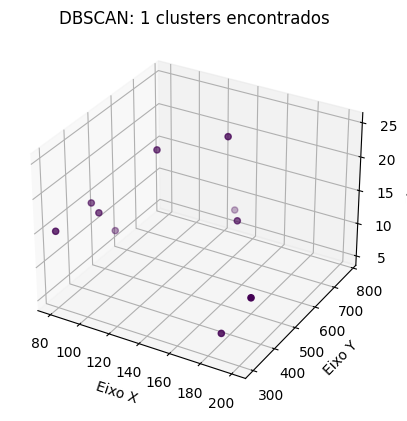

In [30]:
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(imoveis_df['Area'], imoveis_df['Valor'], imoveis_df['Dist_praia'], c=imoveis_df['cluster'])


ax.set_title('DBSCAN: %d clusters encontrados' % n_clusters)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

plt.show()


In [32]:
# Algoritmo Isolation Forest

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest # Algoritmo para utilizar o método Isolation Forest


In [31]:
# Gerar dados simulados
np.random.seed(0)
n_samples = 1000
tempo = np.random.uniform(low=0, high=10, size=n_samples)
temperatura = np.random.normal(loc=25, scale=5, size=n_samples)
vibracao = np.random.normal(loc=0, scale=2, size=n_samples)
corrente = np.random.normal(loc=10, scale=2, size=n_samples)



In [33]:
# Criar o array NumPy com os dados
dados_maquina = np.column_stack((tempo, temperatura, vibracao, corrente))
# Aplicar o algoritmo Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=0)
isolation_forest.fit(dados_maquina[:, 1:])  # Excluindo a coluna de tempo
# Obter os rótulos de anomalia (-1 para anomalias, 1 para dados normais)
labels = isolation_forest.predict(dados_maquina[:, 1:])
# Exibir os resultados
n_anomalias = np.sum(labels == -1)
print(f"Número de anomalias detectadas: {n_anomalias}")


Número de anomalias detectadas: 50


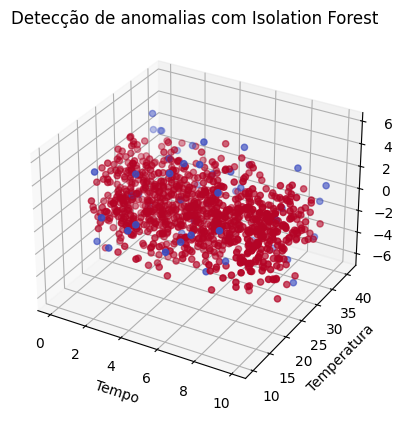

In [34]:
# Gráfico 3D com anomalias destacadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tempo, temperatura, vibracao, c=labels, cmap='coolwarm')
ax.set_xlabel('Tempo')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Vibração')
plt.title('Detecção de anomalias com Isolation Forest')
plt.show()


In [35]:
import numpy as np

peso = np.array([55, 58, 60, 62, 64, 57, 59, 63, 65, 61, 62, 64, 55, 58, 60, 62, 64, 57, 59, 63, 65, 61,
                  62, 64, 55, 58, 60, 62, 64, 57, 59, 63, 65, 61, 62, 64, 55, 58, 60, 62, 64, 57, 59, 63, 65, 61, 62, 64])

media_peso = np.mean(peso)
desvio_padrão_peso = np.std(peso, ddof=1)  # Usamos ddof=1 para calcular o desvio padrão amostral.
variancia_peso = np.var(peso, ddof=1)  # Mesma coisa para a variância.

print("Média do peso:", media_peso)
print("Desvio padrão do peso:", desvio_padrão_peso)
print("Variância do peso:", variancia_peso)

alfa = 0.05

from scipy import stats

# Teste de hipótese
t_statistic, p_valor = stats.ttest_1samp(peso, 63)

print("Estatística t:", t_statistic)
print("Valor p:", p_valor)

if p_valor < alfa:
    print("Rejeitar H0: A média do peso é maior do que 63 gramas. O lote de peças deve ser reprovado.")
else:
    print("Não podemos rejeitar H0: A média do peso é menor ou igual a 63 gramas. O lote de peças pode ser aprovado.")

Média do peso: 60.833333333333336
Desvio padrão do peso: 2.9988177339442355
Variância do peso: 8.99290780141844
Estatística t: -5.005675012861383
Valor p: 8.25228721595827e-06
Rejeitar H0: A média do peso é maior do que 63 gramas. O lote de peças deve ser reprovado.
